#Confronting a Crisis: A Textual Analysis of the The Great Depression From Hoover to FDR
### Author: Juliana Torres, julianatorres@berkeley.edu
### Instructor: Dr. Adam Anderson, PhD 
### Summer 2021

###To get started running this notebook on your computer, follow the steps below:

1. Save this notebook in a dedicated folder in your Google Drive.
2. Inside that same folder, save FDR_speeches.txt and FDR_speeches.csv. Also save Hoover_speeches.txt and Hoover_speeches.csv inside of that folder.
3. Run (press Shift + Return) the cell below and follow the instructions to connect your Google Drive.

In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##From Liberalism to the New Deal in Language
When FDR became president in 1933, he encountered a nation that had nosedived into despair. The Great Depression was entering its fourth year, and the unemployment rate was at 24.9%, the highest in the country's history. Around 26,000 businesses failed. Stock prices plummeted. It transformed American life.

His predecessor Herbert Hoover had been elected only one year before the market crash. A classic liberal, Hoover believed that economic downturns were part of a capitalist economy and were to be expected. As he said in a speech in 1931, government assistance weakened the American character. Hoover hoped that the solution to the Depression would come from voluntary aid and "associational action" by community members and business people and by maintaining a positive mind frame, often making public statements that "the tide had turned." In the eyes of many Americans, President Hoover's response seemed inadequate and uncaring. His nineteen-century approach to Liberalism no longer served the nation's needs, and FDR's New Deal marked the beginning of a new relationship between Americans and their government. 

My project seeks to find linguist evidence of this sentimental shift between Hoover's Liberalism and FDR's New Deal. I want to do so by analyzing FDR's Fireside Chats, a series of 27 speeches transmitted by radio where the president communicated directly with the people, and Hoover's speeches from the start of the Depression until he leaves office. By analyzing the most frequently used words, sentiment, and topics of the speeches, I hope to find what made one so comforting while the other seemed so out of touch.  

In [10]:
#Downloading the following libraries:

##basic libraries
import numpy as np
import pandas as pd
from os import path
import re
from collections import Counter

##libraries to clean and organize my text data
import unicodedata
from string import punctuation
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem.snowball import SnowballStemmer
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")


##visualization library
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('seaborn-bright')
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams, bigrams, trigrams
import spacy
import seaborn as sns 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


###Gathering the Data
For this project, I used the transcription of 27 Fireside Chats available via The American Presidency Project at UCSB and Hoover speeches offered by the Miller Center at the University of Virginia. I manually copied and pasted them in separate Google Drive files and exported them as a .csv file.

The American Presidency Project: https://www.presidency.ucsb.edu/documents/app-categories/spoken-addresses-and-remarks/presidential/fireside-chats

The Miller Center: https://millercenter.org/the-presidency/presidential-speeches


Below I will import the data organized by date on a .csv file and present it in a dataframe. 

In [11]:
#Loading the dataframe in .csv

FDR_speeches = pd.read_csv('/content/drive/My Drive/Juliana/FDR_speeches.csv')
Hoover_speeches = pd.read_csv('/content/drive/My Drive/Juliana/Hoover_speeches.csv')


Below is FDR's speeches presented in a dataframe:

In [12]:
FDR_speeches.head()

,Number,Date,Central theme,Speech
0,1,"Mar 12, 1933",Economy,“I want to talk for a few minutes with the peo...
1,2,"May 07, 1933",Economy,“On A Sunday night a week after my Inauguratio...
2,3,"Jul 24, 1933",New Deal,“After the adjournment of the historical speci...
3,4,"Oct 22, 1933",New Deal,“It is three months since I have talked with t...
4,5,"Jun 28, 1934",Economy,“It has been several months since I have talke...


And here are Hoover's speeches presented in a dataframe:


In [13]:
Hoover_speeches.head()

,Number,Date,Speech
0,1,"Oct 25, 1929","""The fundamental business of the country, that..."
1,2,"Nov 5, 1929",“I haven't anything of any news here to announ...
2,3,"Nov 19, 1929",“We are dealing here with a psychological situ...
3,4,"Dec 3, 1929","""To the Senate and House of Representatives: T..."
4,5,"Mar 7, 1930","""The Departments of Commerce and Labor are eng..."


###Organizing the Data:
For this project, it was really important to understand the text in the word level, so I wanted to use n-grams and wordclouds to understand word repetiton and try to identify the target of those messages.

Since I was dealing with a reasonable amount of text, I manually copied all the speeches into their separate .txt files and used some of the above libraries to perform the following cleaning and preparing steps:

  1. Load the new dataframe in .txt
  2. Tokenize the text so that each word in separated. I will use .split() to do it.
  3. Remove punctuations. 
  4. Remove stopwords, frequently used words that do not add to the analysis. 
  5. Lemmatization of the words to standardize the text. This will give you     results that are more relevant and comprehensive. 
 

In [14]:
#Loading the dataframe in .txt:

with open ('/content/drive/My Drive/Juliana/FDR_speeches.txt', "r") as myfile:
    FDR_speeches_text=myfile.readlines()

with open ('/content/drive/My Drive/Juliana/Hoover_speeches.txt', "r") as myfile:
    Hoover_speeches_text=myfile.readlines()


In [15]:
#Loading #Spacy pre-trained model:

nlp = spacy.load("en_core_web_sm", disable=["ner", "textcat"])

In [16]:
#Now I will create a function and use SpaCy to lemmatize FDR's speeches. Since SpaCy models operate on string and not lists, I will first turn the tokens back into a string:

def lemmatize(string):
  doc = nlp(string)
  return [token.lemma_.lower() for token in doc]

FDR_lemmas = lemmatize(FDR_speeches_text[0])
Hoover_lemmas = lemmatize(Hoover_speeches_text[0])

print(FDR_lemmas)
print(Hoover_lemmas)





['-pron-', 'want', 'to', 'talk', 'for', 'a', 'few', 'minute', 'with', 'the', 'people', 'of', 'the', 'united', 'states', 'about', 'banking', '—', 'with', 'the', 'comparatively', 'few', 'who', 'understand', 'the', 'mechanic', 'of', 'banking', 'but', 'more', 'particularly', 'with', 'the', 'overwhelming', 'majority', 'who', 'use', 'bank', 'for', 'the', 'making', 'of', 'deposit', 'and', 'the', 'drawing', 'of', 'check', '.', '-pron-', 'want', 'to', 'tell', '-pron-', 'what', 'have', 'be', 'do', 'in', 'the', 'last', 'few', 'day', ',', 'why', '-pron-', 'be', 'do', ',', 'and', 'what', 'the', 'next', 'step', 'be', 'go', 'to', 'be', '.', '-pron-', 'recognize', 'that', 'the', 'many', 'proclamation', 'from', 'state', 'capitol', 'and', 'from', 'washington', ',', 'the', 'legislation', ',', 'the', 'treasury', 'regulation', ',', 'etc', '.', ',', 'couch', 'for', 'the', 'most', 'part', 'in', 'banking', 'and', 'legal', 'term', ',', 'should', 'be', 'explain', 'for', 'the', 'benefit', 'of', 'the', 'average',

In [17]:
#Tokenizing FDR's speeches. Note the difference:

FDR_tokenized = FDR_speeches_text[0].split()
print(FDR_tokenized)
print(len(FDR_speeches_text))
print(len(FDR_tokenized))

['I', 'want', 'to', 'talk', 'for', 'a', 'few', 'minutes', 'with', 'the', 'people', 'of', 'the', 'United', 'States', 'about', 'banking—with', 'the', 'comparatively', 'few', 'who', 'understand', 'the', 'mechanics', 'of', 'banking', 'but', 'more', 'particularly', 'with', 'the', 'overwhelming', 'majority', 'who', 'use', 'banks', 'for', 'the', 'making', 'of', 'deposits', 'and', 'the', 'drawing', 'of', 'checks.', 'I', 'want', 'to', 'tell', 'you', 'what', 'has', 'been', 'done', 'in', 'the', 'last', 'few', 'days,', 'why', 'it', 'was', 'done,', 'and', 'what', 'the', 'next', 'steps', 'are', 'going', 'to', 'be.', 'I', 'recognize', 'that', 'the', 'many', 'proclamations', 'from', 'State', 'capitols', 'and', 'from', 'Washington,', 'the', 'legislation,', 'the', 'Treasury', 'regulations,', 'etc.,', 'couched', 'for', 'the', 'most', 'part', 'in', 'banking', 'and', 'legal', 'terms,', 'should', 'be', 'explained', 'for', 'the', 'benefit', 'of', 'the', 'average', 'citizen.', 'I', 'owe', 'this', 'in', 'parti

In [18]:
#Tokenizing Hoover's speeches:

Hoover_tokenized = Hoover_speeches_text[0].split()
print(Hoover_tokenized)
print(len(Hoover_speeches_text))
print(len(Hoover_tokenized))



['The', 'fundamental', 'business', 'of', 'the', 'country,', 'that', 'is', 'the', 'production', 'and', 'distribution', 'of', 'commodities,', 'is', 'on', 'a', 'sound', 'and', 'prosperous', 'basis.', 'The', 'best', 'evidence', 'is', 'that', 'although', 'production', 'and', 'consumption', 'are', 'at', 'high', 'levels,', 'the', 'average', 'prices', 'of', 'commodities', 'as', 'a', 'whole', 'have', 'not', 'increased', 'and', 'there', 'have', 'been', 'no', 'appreciable', 'increases', 'in', 'the', 'stocks', 'of', 'manufactured', 'goods.', 'Moreover,', 'there', 'has', 'been', 'a', 'tendency', 'of', 'wages', 'to', 'increase,', 'the', 'output', 'per', 'worker', 'in', 'many', 'industries', 'again', 'shows', 'an', 'increase,', 'all', 'of', 'which', 'indicates', 'a', 'healthy', 'condition.The', 'construction', 'and', 'building', 'material', 'industries', 'have', 'been', 'to', 'some', 'extent', 'affected', 'by', 'the', 'high', 'interest', 'rates', 'induced', 'by', 'stock', 'speculation', 'and', 'there

In [19]:
#Removing punctuation from FDR's speeches:

FDR_tokenized_no_punc = [re.sub(r"[^\w\s]", "", sent) for sent in FDR_lemmas] 
print(FDR_tokenized_no_punc)


['pron', 'want', 'to', 'talk', 'for', 'a', 'few', 'minute', 'with', 'the', 'people', 'of', 'the', 'united', 'states', 'about', 'banking', '', 'with', 'the', 'comparatively', 'few', 'who', 'understand', 'the', 'mechanic', 'of', 'banking', 'but', 'more', 'particularly', 'with', 'the', 'overwhelming', 'majority', 'who', 'use', 'bank', 'for', 'the', 'making', 'of', 'deposit', 'and', 'the', 'drawing', 'of', 'check', '', 'pron', 'want', 'to', 'tell', 'pron', 'what', 'have', 'be', 'do', 'in', 'the', 'last', 'few', 'day', '', 'why', 'pron', 'be', 'do', '', 'and', 'what', 'the', 'next', 'step', 'be', 'go', 'to', 'be', '', 'pron', 'recognize', 'that', 'the', 'many', 'proclamation', 'from', 'state', 'capitol', 'and', 'from', 'washington', '', 'the', 'legislation', '', 'the', 'treasury', 'regulation', '', 'etc', '', '', 'couch', 'for', 'the', 'most', 'part', 'in', 'banking', 'and', 'legal', 'term', '', 'should', 'be', 'explain', 'for', 'the', 'benefit', 'of', 'the', 'average', 'citizen', '', 'pron

In [20]:
#Removing punctuation from Hoover's speeches:

Hoover_tokenized_no_punc = [re.sub(r"[^\w\s]", "", sent) for sent in Hoover_lemmas] 
print(Hoover_tokenized_no_punc)

['the', 'fundamental', 'business', 'of', 'the', 'country', '', 'that', 'be', 'the', 'production', 'and', 'distribution', 'of', 'commodity', '', 'be', 'on', 'a', 'sound', 'and', 'prosperous', 'basis', '', 'the', 'good', 'evidence', 'be', 'that', 'although', 'production', 'and', 'consumption', 'be', 'at', 'high', 'level', '', 'the', 'average', 'price', 'of', 'commodity', 'as', 'a', 'whole', 'have', 'not', 'increase', 'and', 'there', 'have', 'be', 'no', 'appreciable', 'increase', 'in', 'the', 'stock', 'of', 'manufacture', 'good', '', 'moreover', '', 'there', 'have', 'be', 'a', 'tendency', 'of', 'wage', 'to', 'increase', '', 'the', 'output', 'per', 'worker', 'in', 'many', 'industry', 'again', 'show', 'an', 'increase', '', 'all', 'of', 'which', 'indicate', 'a', 'healthy', 'condition', '', 'the', 'construction', 'and', 'building', 'material', 'industry', 'have', 'be', 'to', 'some', 'extent', 'affect', 'by', 'the', 'high', 'interest', 'rate', 'induce', 'by', 'stock', 'speculation', 'and', 'th

###Visualizing the data
To get an early insight into the data and see the most obvious distinctions, it can be useful to create a wordcloud with the most frequently used words in the text. 

To create the wordcloud, import your textual data and perform the steps above to prepare the text for analysis. While creating the wordcloud, remove the stop words to have a more relevant result.

Below is the code to create your wordcloud. Don't forget to replace the data with your own document. 

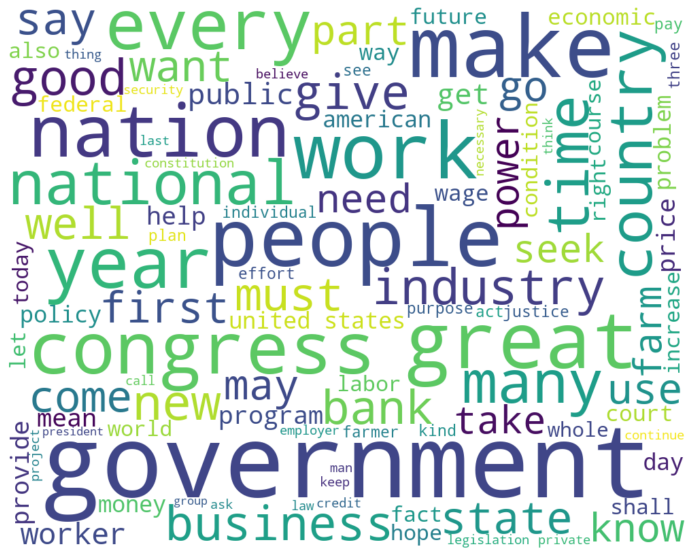

In [21]:
#Creating a wordcloud for FDR's speeches and excluding stopwords: 


stop_words = set(stopwords.words("english"))
stop_words.update(["war", "peace", "would", "thus", "Japanese", "one", "two", " ", "", "-pron-", "pron"])

map_mask = np.array(Image.open('/content/drive/My Drive/Juliana/usamap.png'))

def make_wordcloud(speech_lemmas):
  speech_string = " ".join(speech_lemmas)
  wordcloud = WordCloud(width=1000, height=800, mode="RGBA", background_color ='white', max_words=100,
    stopwords = stop_words).generate(speech_string)
  
  plt.figure( figsize=(20,10) )
  plt.imshow(wordcloud, interpolation='bilinear') 
  plt.axis("off")
  plt.show()
  
make_wordcloud(FDR_lemmas)







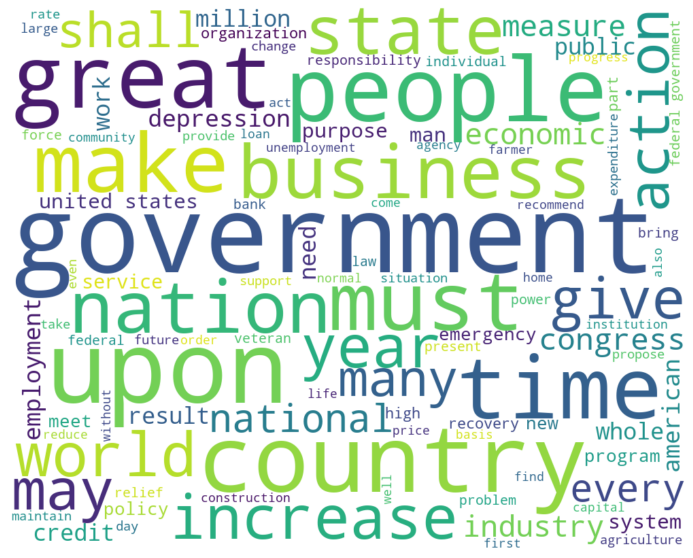

In [22]:
#And here is a wordcloud for Hoover's speeches:

make_wordcloud(Hoover_lemmas)


In [25]:
#Counting word frequency of the 20 most used words and then using Matplotlib to visualize it in a graph:

FDR_no_stop = [word for word in FDR_tokenized_no_punc if word not in stop_words]
FDR_freq = Counter(FDR_no_stop)
FDR_freq.most_common(20)


[('government', 212),
 ('people', 171),
 ('make', 146),
 ('work', 129),
 ('year', 127),
 ('great', 106),
 ('country', 103),
 ('congress', 99),
 ('every', 96),
 ('national', 96),
 ('nation', 85),
 ('many', 80),
 ('industry', 79),
 ('time', 79),
 ('business', 78),
 ('give', 78),
 ('bank', 74),
 ('good', 74),
 ('new', 71),
 ('power', 70)]

In [24]:
#Counting word frequency of the 20 most used words:

Hoover_no_stop = [word for word in Hoover_tokenized_no_punc if word not in stop_words]
Hoover_freq = Counter(Hoover_no_stop)
Hoover_freq.most_common(20)

[('government', 333),
 ('upon', 256),
 ('people', 210),
 ('year', 209),
 ('country', 206),
 ('federal', 174),
 ('system', 156),
 ('great', 155),
 ('american', 153),
 ('increase', 151),
 ('time', 150),
 ('public', 142),
 ('economic', 142),
 ('make', 137),
 ('congress', 137),
 ('must', 136),
 ('business', 133),
 ('world', 133),
 ('nation', 131),
 ('may', 122)]